**US MASS SHOOTING**

An Exploratory Analysis has been performed in order to uncover hidden insights.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import seaborn as sns
from geopy.geocoders import Nominatim
color = sns.color_palette()

import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

In [2]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

ms = pd.read_csv("../input/Mass Shootings Dataset.csv", encoding = "ISO-8859-1", parse_dates=["Date"])
print("Data Dimensions are: ", ms.shape)

Mass Shootings Dataset Ver 2.csv
Mass Shootings Dataset.csv

Data Dimensions are:  (398, 13)


*Total shooting attacks are 398.*

In [3]:
ms.columns

Index(['S#', 'Title', 'Location', 'Date', 'Summary', 'Fatalities', 'Injured',
       'Total victims', 'Mental Health Issues', 'Race', 'Gender', 'Latitude',
       'Longitude'],
      dtype='object')

In [4]:
ms.head()

S#                                 Title            Location       Date  \
0   1         Las Vegas Strip mass shooting       Las Vegas, NV 2017-10-01   
1   2            San Francisco UPS shooting   San Francisco, CA 2017-06-14   
2   3     Pennsylvania supermarket shooting     Tunkhannock, PA 2017-06-07   
3   4  Florida awning manufacturer shooting    Orlando, Florida 2017-06-05   
4   5      Rural Ohio nursing home shooting  Kirkersville, Ohio 2017-05-12   

                                             Summary  Fatalities  Injured  \
0                                                NaN          58      515   
1  Jimmy Lam, 38, fatally shot three coworkers an...           3        2   
2  Randy Stair, a 24-year-old worker at Weis groc...           3        0   
3  John Robert Neumann, Jr., 45, a former employe...           5        0   
4  Thomas Hartless, 43, shot and killed a former ...           3        0   

   Total victims Mental Health Issues   Race Gender  Latitude  Longitude  
0            573              Unclear    NaN    NaN       NaN        NaN  
1              5                  Yes  Asian      M       NaN        NaN  
2              3              Unclear  White      M       NaN        NaN  
3              5              Unclear    NaN      M       NaN        NaN  
4              3                  Yes  White      M       NaN        NaN

In [5]:
ms = ms.sort_values('Date')

**Lets see how many  people had been affected since 1966**

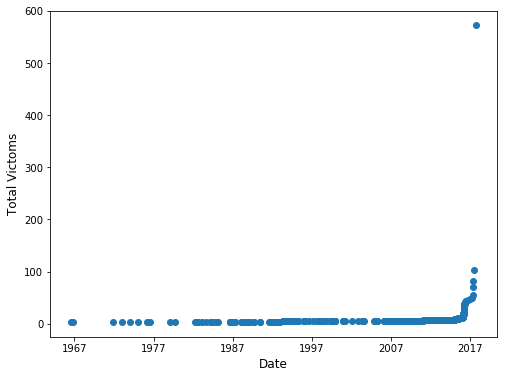

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(np.sort(ms['Date']), np.sort(ms['Total victims'].values))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Victoms', fontsize=12)
plt.show()

We see a sudden increase in 2016. Let's look deeper into 2016 incidents history.

In [7]:
# mass shooting by date
ms_perdate = np.asarray(ms.groupby('Date')['Fatalities'].sum())

# thirty day moving average of ms fatalites by date
ms_average = pd.Series(ms_perdate).rolling(window=30).mean()
ms_average = np.asarray(ms_average.drop(ms_average.index[:397]))
ms_average = np.round(ms_average, 0)

ms_dates = np.arange('2016-01', '2017-01', dtype='datetime64[D]')
ms_range = ms_dates[15:351]

trace_date = go.Scatter(
             x = ms_dates,
             y = ms_perdate,
             mode = 'lines',
             name = 'Fatalities',
             line = dict(
                 color = 'rgb(215, 0, 0)',
                 width = 3)
             )

trace_mean = go.Scatter(
             x = ms_range,
             y = ms_average,
             mode = 'lines',
             name = 'Average',
             line = dict(
                 color = 'rgb(215, 0, 0)',
                 width = 5),
             opacity = 0.33
             )

layout = go.Layout(
         title = 'Mass Shooting Fatalities by Date in United States <br>'
                 '<sub>Hover & Rescale Plot to Desired Dates</sub>',
         showlegend = False,
         xaxis = dict(
             rangeslider = dict(thickness = 0.05),
             type = 'date',
             showline = True,
             showgrid = False
         ),
         yaxis = dict(
             range = [0, 65],
             autotick = False,
             tick0 = 10,
             dtick = 10,
             showline = True,
             showgrid = False)
         )

data = [trace_date, trace_mean]
figure = dict(data = data, layout = layout)
iplot(figure)

** Mass Shooting over the Time:**

Lets explore the Total affectees over the time.

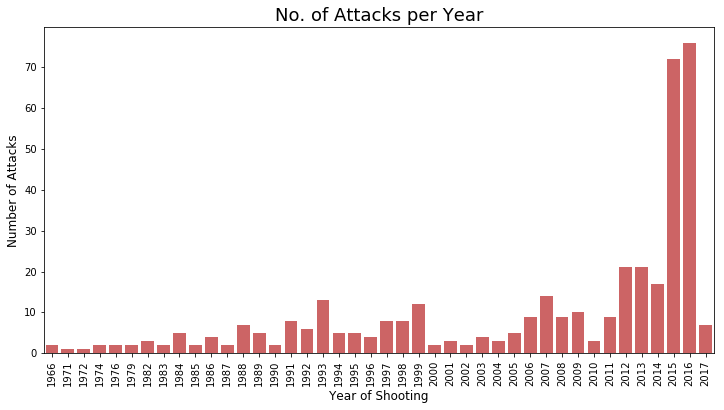

In [8]:
ms['Year'] = ms['Date'].dt.year

cnt_srs = ms['Year'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Year of Shooting', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('No. of Attacks per Year', fontsize=18)
plt.show()

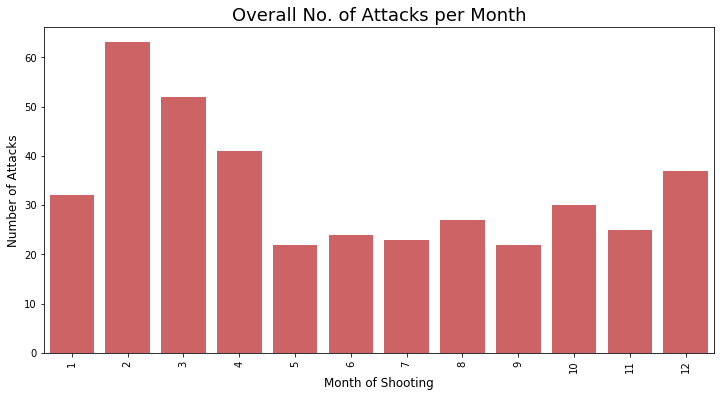

In [9]:
ms['Month'] = ms['Date'].dt.month

cnt_srs = ms['Month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Month of Shooting', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Overall No. of Attacks per Month', fontsize=18)
plt.show()

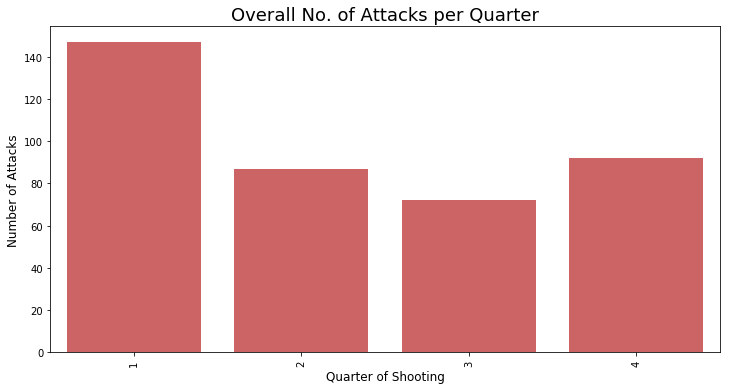

In [10]:
ms['Quarter'] = ms['Date'].dt.quarter

cnt_srs = ms['Quarter'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Quarter of Shooting', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Overall No. of Attacks per Quarter', fontsize=18)
plt.show()

*No of shooting attacks in first quarter are almost 2 times higher than other quarters. 
This can be further dig down on locations to see the state/city specific trends. *

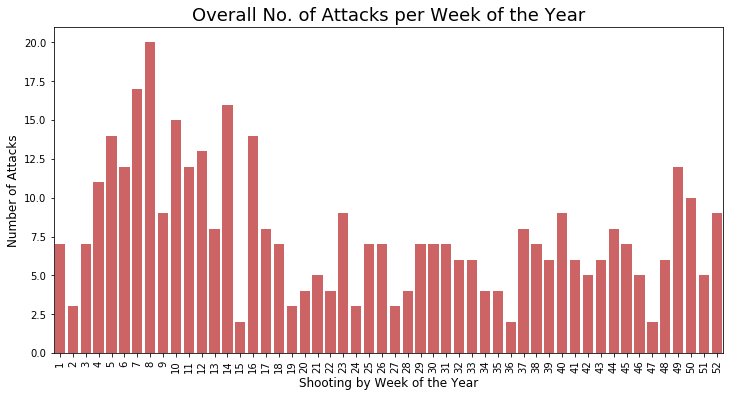

In [11]:
ms['WoY'] = ms['Date'].dt.weekofyear

cnt_srs = ms['WoY'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Shooting by Week of the Year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Overall No. of Attacks per Week of the Year', fontsize=18)
plt.show()


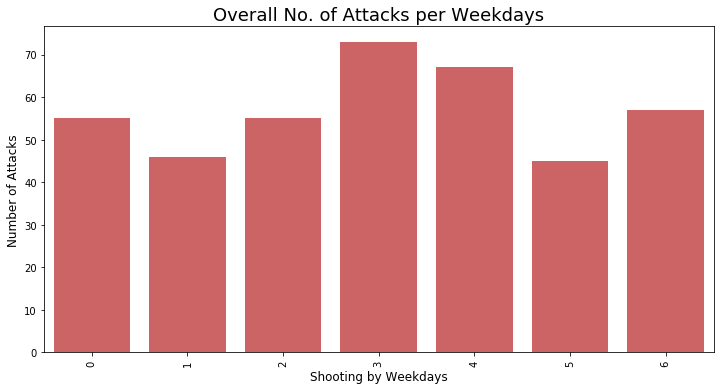

In [12]:
ms['DoW'] = ms['Date'].dt.dayofweek

cnt_srs = ms['DoW'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Shooting by Weekdays', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Overall No. of Attacks per Weekdays', fontsize=18)
plt.show()

*Zero represents Monday and 6 represents Sunday.*

*So, the shooting attacks are high on Thursday and Friday. *

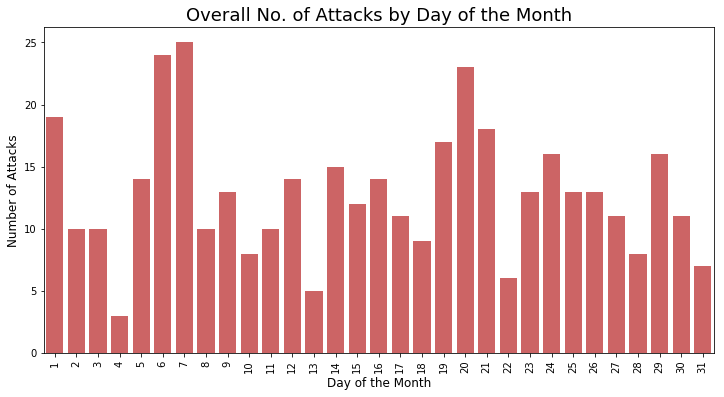

In [13]:
ms['DoM'] = ms['Date'].dt.day

cnt_srs = ms['DoM'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Day of the Month', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Overall No. of Attacks by Day of the Month', fontsize=18)
plt.show()

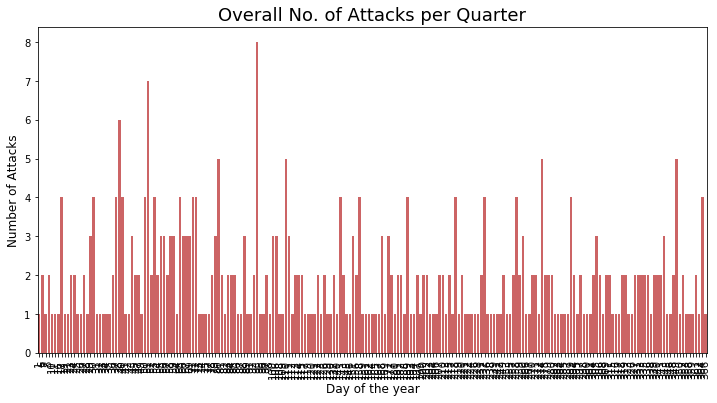

In [14]:
ms['DoY'] = ms['Date'].dt.dayofyear

cnt_srs = ms['DoY'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Day of the year', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Overall No. of Attacks per Quarter', fontsize=18)
plt.show()

Lets look shooting attacks pattren into weekdays and weekends perspective.

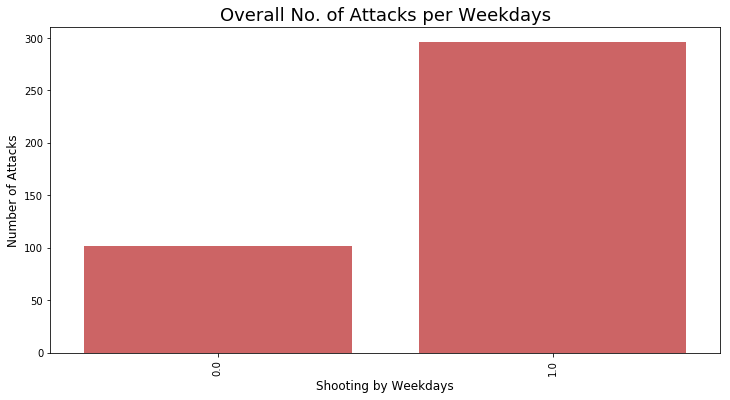

In [15]:
ms['weekdayflg'] =( ms['DoW'] // 5 != 1).astype(float)

cnt_srs = ms['weekdayflg'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Shooting by Weekdays', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Overall No. of Attacks per Weekdays', fontsize=18)
plt.show()


*No. of shooting attacks are ~3 times high on weekdays as compare to weekends*
By considering this, we can think of what could be the motives of this. **If we merge and dig into news data with +2/-2 days, we can better find the reasons.**

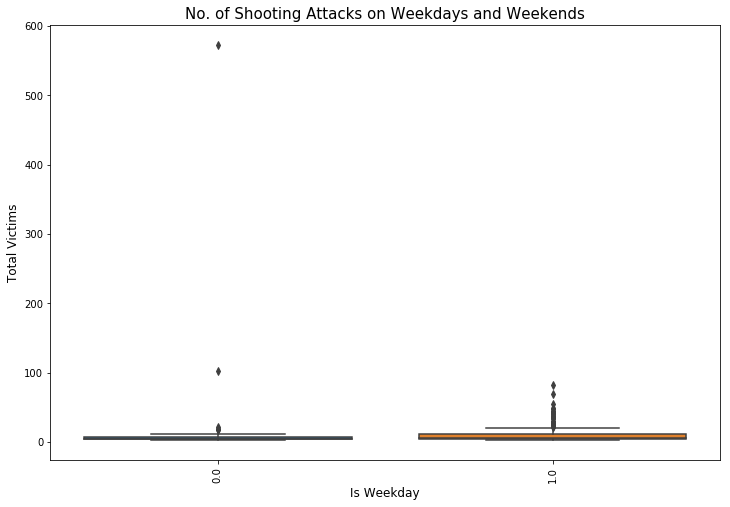

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(x="weekdayflg", y="Total victims", data=ms)
plt.ylabel('Total Victims', fontsize=12)
plt.xlabel('Is Weekday', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("No. of Shooting Attacks on Weekdays and Weekends", fontsize=15)
plt.show()

Lets replot this graph by excluding one extreme/outlier value.

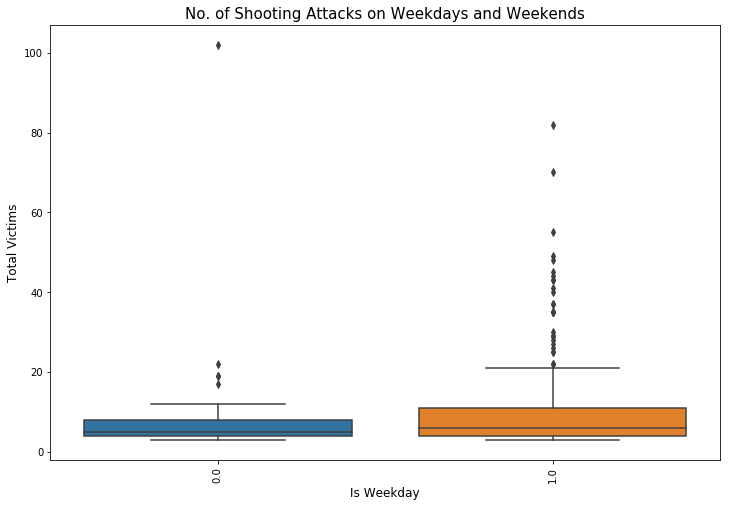

In [17]:
plt.figure(figsize=(12,8))
sns.boxplot(x="weekdayflg", y="Total victims", data=ms[ms['Total victims'] < 500])
plt.ylabel('Total Victims', fontsize=12)
plt.xlabel('Is Weekday', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("No. of Shooting Attacks on Weekdays and Weekends", fontsize=15)
plt.show()   

*We can observe that 25% - 75%  victims lie between 4-14 on Weekdays and 4-9 on Weekends*

** Mass Shooting over the Location:**
Let's split Location to look deep into targeted areas

In [18]:
ms['City'] = ms['Location'].str.rpartition(',')[0]#.str.replace(",", " ")
ms['State'] = ms['Location'].str.rpartition(',')[2]

In [19]:
ms[ms[['City']].apply(lambda x: x[0].isdigit(), axis=1)].head(10)

S#                                      Title Location       Date  \
82  83             Residence in Lakeland, Florida  42375,  2016-01-06   
81  82             Roadside in Memphis, Tennessee  42376,  2016-01-07   
80  81                     Wilmington, DE robbery  42380,  2016-01-11   
79  80         Gloucester County, VA, House Party  42386,  2016-01-17   
78  79                       Los Angeles Drive-by  42392,  2016-01-23   
77  78                      Florida family murder  42392,  2016-01-23   
76  77     Perris, CA Mexican restaurant shooting  42394,  2016-01-25   
75  76       Chesapeake, VA Family Murder Suicide  42396,  2016-01-27   
73  74  Caroline County, VA Family Murder Suicide  42398,  2016-01-29   
72  73          Glendale, AZ House Party shooting  42399,  2016-01-30   

                                              Summary  Fatalities  Injured  \
82  Two men arrived at the house of a drug dealer ...           3        1   
81  A woman flagged down a car to help her with he...           1        3   
80  Two men forcefully entered a house, and starte...           1        4   
79  A young woman threw a house party for her birt...           1        3   
78  Group of people was standing outside of a Liqu...           2        2   
77  A young man shot his mother, step-father, and ...           3        0   
76  Very little is known about the case. Cops were...           1        4   
75  26-year-old killed his Mother, Father, Grandmo...           6        0   
73  42-year-old husband murders wife, shoots two y...           2        2   
72  Altercation broke out at a house party. A grou...           3        5   

    Total victims Mental Health Issues                                 Race  \
82              4              Unknown   Black American or African American   
81              4              Unknown                              Unknown   
80              5              Unknown   Black American or African American   
79              4              Unknown   Black American or African American   
78              4              Unknown                              Unknown   
77              3              Unknown  White American or European American   
76              5              Unknown                              Unknown   
75              5              Unknown  White American or European American   
73              3              Unknown                              Unknown   
72              8              Unknown                              Unknown   

     Gender   Latitude   Longitude  Year  Month  Quarter  WoY  DoW  DoM  DoY  \
82     Male  28.039465  -81.949804  2016      1        1    1    2    6    6   
81  Unknown  35.149534  -90.048980  2016      1        1    1    3    7    7   
80     Male  39.739072  -75.539788  2016      1        1    2    0   11   11   
79     Male  37.402640  -76.458559  2016      1        1    2    6   17   17   
78  Unknown  34.052234 -118.243685  2016      1        1    3    5   23   23   
77     Male  30.754181  -86.572799  2016      1        1    3    5   23   23   
76     Male  33.782519 -117.228648  2016      1        1    4    0   25   25   
75     Male  36.768209  -76.287493  2016      1        1    4    2   27   27   
73     Male  38.044556  -77.286488  2016      1        1    4    4   29   29   
72     Male  33.538652 -112.185987  2016      1        1    4    5   30   30   

    weekdayflg   City State  
82         1.0  42375        
81         1.0  42376        
80         1.0  42380        
79         0.0  42386        
78         0.0  42392        
77         0.0  42392        
76         1.0  42394        
75         1.0  42396        
73         1.0  42398        
72         0.0  42399

**Now, we will explore that in  which States and Cities shooting incidents are common.**

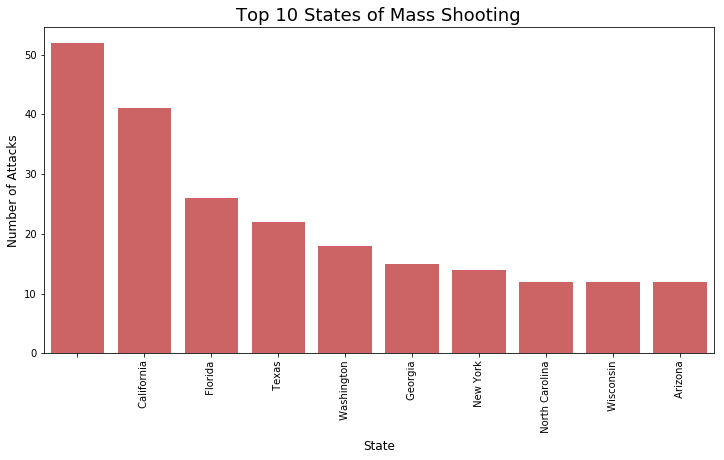

In [20]:
cnt_srs = ms['State'].value_counts()
cnt_srs = cnt_srs.head(10)
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('State', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Top 10 States of Mass Shooting', fontsize=18)
plt.show()

*The first bar is representing the missing values of zipcodes. Other than this, California, Florida and Texas are the top three states where shooting incidents are high*

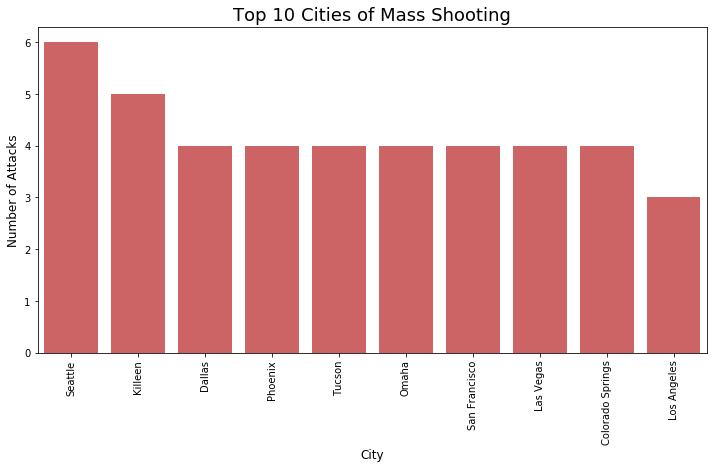

In [21]:
cnt_srs = ms['City'].value_counts()
cnt_srs = cnt_srs.head(10)
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Top 10 Cities of Mass Shooting', fontsize=18)
plt.show()

Here, we will explore the latitude and longitude variables as well.

In [22]:
ms['text'] = ms['Date'].dt.strftime('%B %-d'
                          ) + ', ' + ms['Fatalities'].astype(str) + ' Fatalities'

data = [dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = ms[ms.Longitude < 0]['Longitude'],
        lat = ms[ms.Longitude < 0]['Latitude'],
        text = ms[ms.Longitude < 0]['text'],
        mode = 'markers',
        marker = dict( 
            size = ms[ms.Longitude < 0]['Fatalities'] ** 0.5 * 5,
            opacity = 0.75,
            color = 'rgb(215, 0, 0)')
        )]

layout = dict(
         title = 'Shooting Fatalities by Latitude/Longitude in United States <br>'
                 '<sub>Hover to View Date and Fatalitiess</sub>',
         geo = dict(
             scope = 'usa',
             projection = dict(type = 'albers usa'),
             showland = True,
             landcolor = 'rgb(250, 250, 250)',
             subunitwidth = 1,
             subunitcolor = 'rgb(217, 217, 217)',
             countrywidth = 1,
             countrycolor = 'rgb(217, 217, 217)',
             showlakes = True,
             lakecolor = 'rgb(255, 255, 255)')
         )

figure = dict(data = data, layout = layout)
iplot(figure)

**Lets observe the behavior by Gender, Race, and  Mental Health Issues**

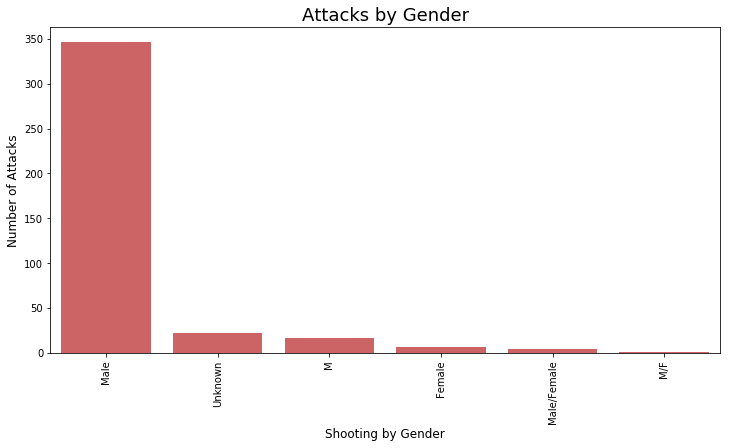

In [23]:
cnt_srs = ms['Gender'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Shooting by Gender', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('Attacks by Gender', fontsize=18)
plt.show()

*Data in Gender column is very rough. Lets fix the values for further analysis. Moreover, Mostly shooter are Male.*

In [24]:
ms.Gender.replace(['M', 'M/F'], ['Male', 'Male/Female'], inplace=True)

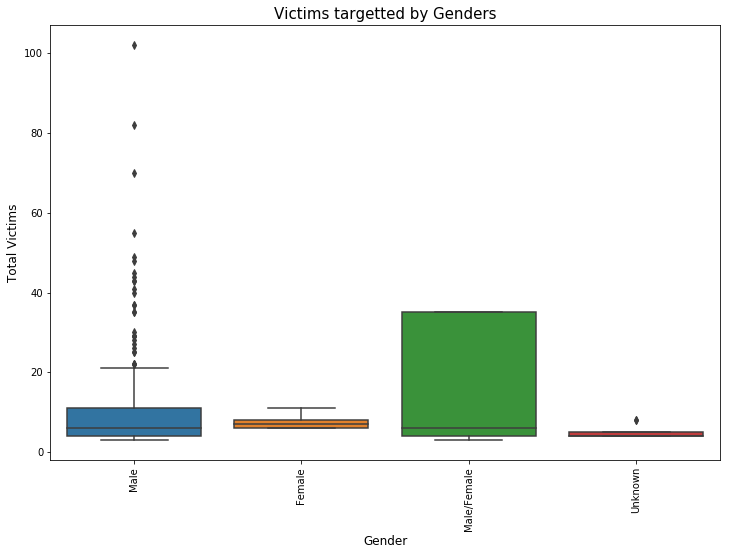

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Gender", y="Total victims", data=ms)
plt.ylabel('Total Victims', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Victims targetted by Genders", fontsize=15)
plt.show()

Wow.. This graph strangely reveals that Male/Female *(Male Shooter with Female)* are more destructive for the community. 
Lets see in which City and State these Male+Female shooting activities are high.

In [26]:
ms[ms['Gender'] == "Male/Female"][['Race', 'Mental Health Issues', 'State','City', 'Total victims']]

Race Mental Health Issues  \
245                White American or European American                   No   
162                White American or European American                   No   
145  White American or European American/Some other...                   No   
84                                               Other              Unclear   
85                                      Asian American              Unknown   

           State             City  Total victims  
245   Washington        Carnation              6  
162       Nevada        Las Vegas              3  
145      Florida  New Port Richey              4  
84    California   San Bernardino             35  
85    California   San Bernardino             35

*The Race of Shooter White American or European American is high *

**Lets Look into Races**

I have aligned few values to make the visual more readable.

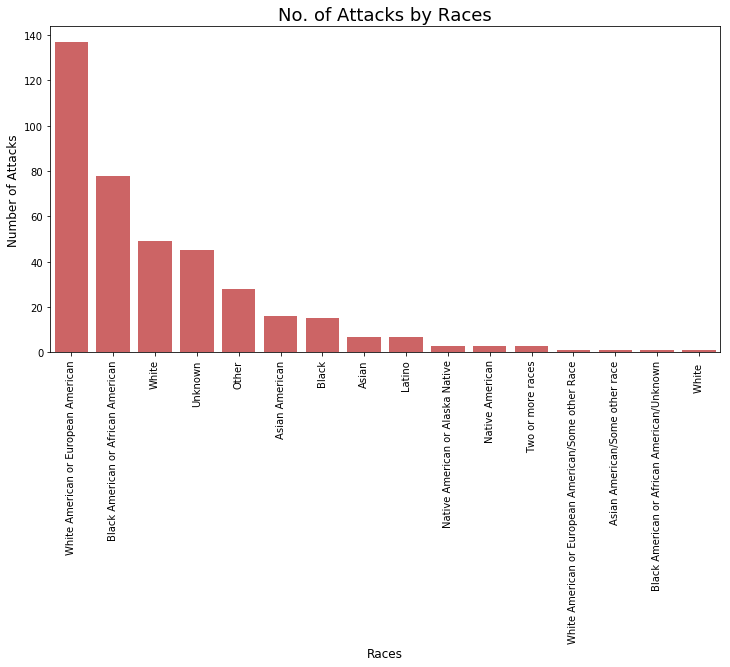

In [27]:
ms.Race.replace(['white', 'black', 'Some other race', 'unclear'], ['White', 'Black', 'Other','Unknown'], inplace=True)

cnt_srs = ms['Race'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Races', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('No. of Attacks by Races', fontsize=18)
plt.show()

*White American or European American Race is way high then others. If we combine White with it, it will become twice higher than Black American or Afican American Race*

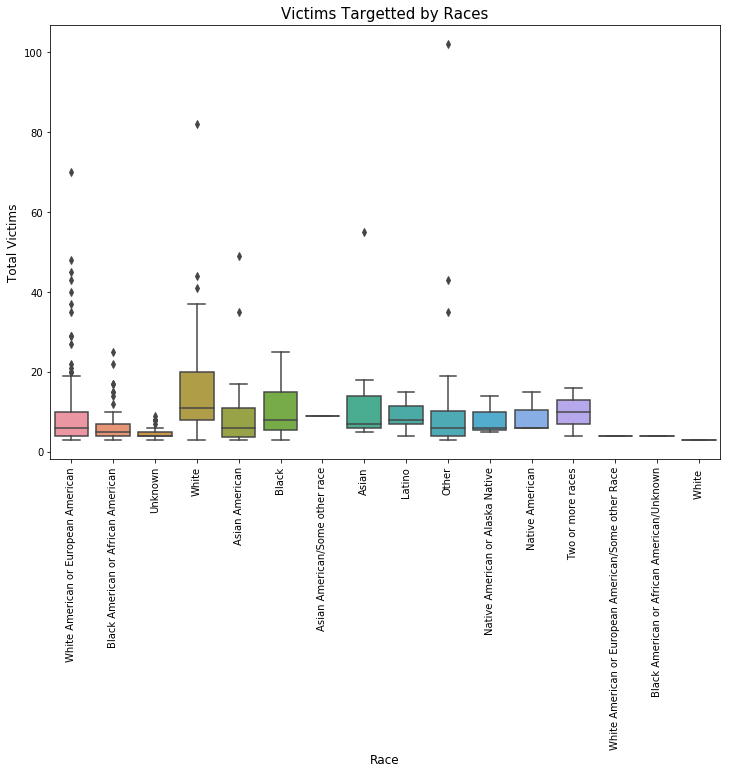

In [28]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Race", y="Total victims", data=ms)
plt.ylabel('Total Victims', fontsize=12)
plt.xlabel('Race', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Victims Targetted by Races", fontsize=15)
plt.show()

In [29]:
ms['Mental Health Issues'].replace(['unknown', 'unclear', 'Unclear'], ['Unknown','Unclear', 'Unclear'], inplace=True)

**Mental Health Issues**

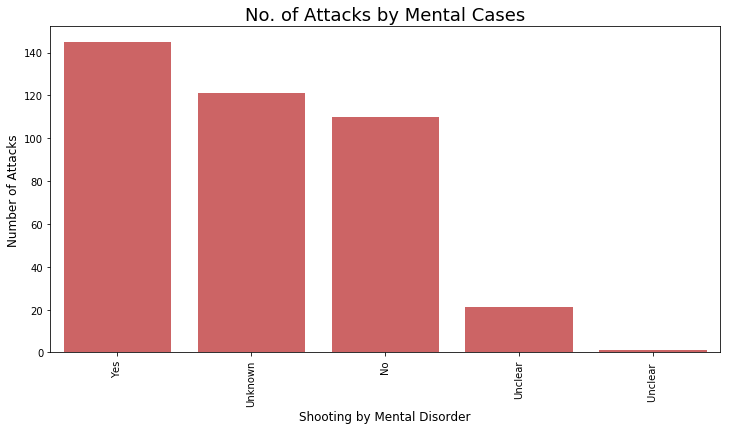

In [30]:
cnt_srs = ms['Mental Health Issues'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xticks(rotation='vertical')
plt.xlabel('Shooting by Mental Disorder', fontsize=12)
plt.ylabel('Number of Attacks', fontsize=12)
plt.title('No. of Attacks by Mental Cases', fontsize=18)
plt.show()

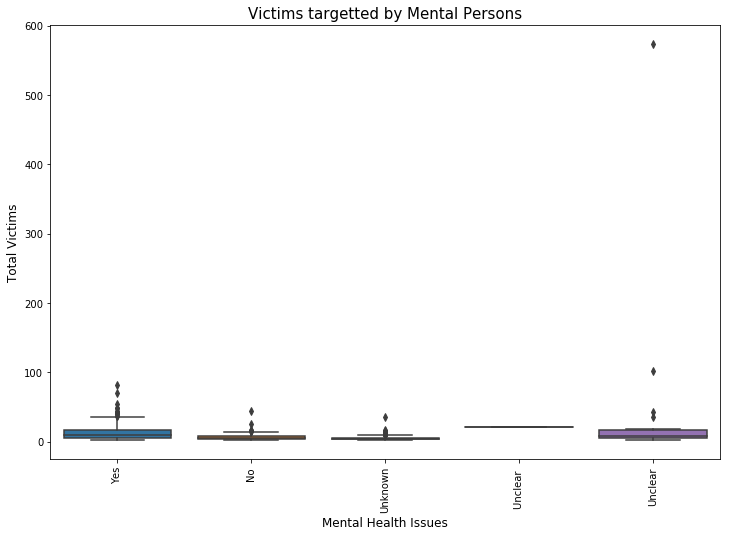

In [31]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Mental Health Issues", y="Total victims", data=ms)
plt.ylabel('Total Victims', fontsize=12)
plt.xlabel('Mental Health Issues', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Victims targetted by Mental Persons", fontsize=15)
plt.show()

**Now we will see how much destruction mental cases has caused.**

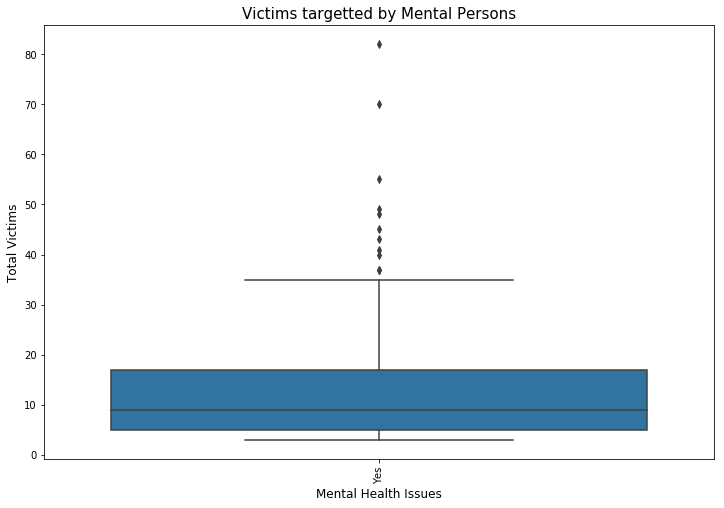

In [32]:
plt.figure(figsize=(12,8))
sns.boxplot(x="Mental Health Issues", y="Total victims", data=ms[ms['Mental Health Issues'] == 'Yes'] )
plt.ylabel('Total Victims', fontsize=12)
plt.xlabel('Mental Health Issues', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Victims targetted by Mental Persons", fontsize=15)
plt.show()

*Majority victims lies between 5 - 18 which are affected by mental disorder persons.*

Now, lets plot the bubble chart for Deaths, Injuries and Total Victims in all States

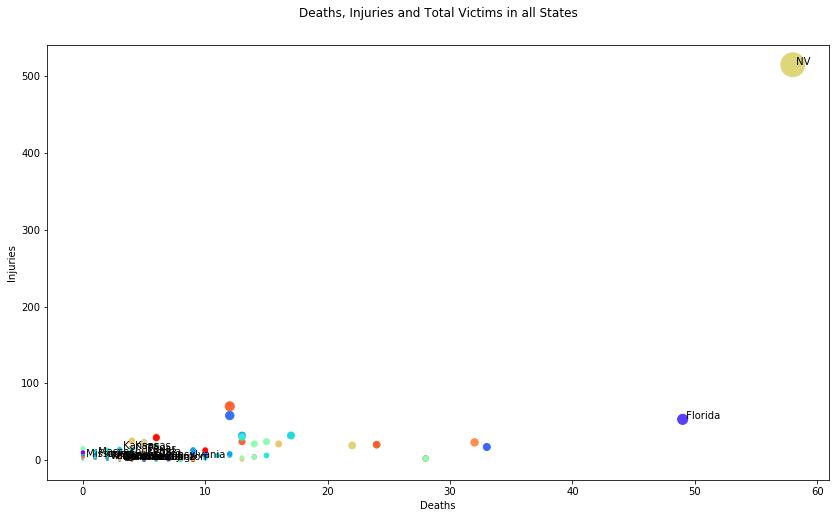

In [33]:
ms1 = ms
plt.figure(figsize=(14,8))

N = ms1.State.value_counts().size
# Choose some random colors
colors=cm.rainbow(np.random.rand(N))

# Use those colors as the color argument
plt.scatter(ms1.Fatalities, ms1.Injured, s=ms['Total victims'],color=colors)
for i in range(N):
    plt.annotate(ms1.State[i],xy=(ms1.Fatalities[i],ms1.Injured[i]))
plt.xlabel('Deaths')
plt.ylabel('Injuries')
# Move title up with the "y" option
plt.title('Deaths, Injuries and Total Victims in all States',y=1.05)
plt.show()


**News Summary**
Lets explore the field of summary which contain the information of incident.

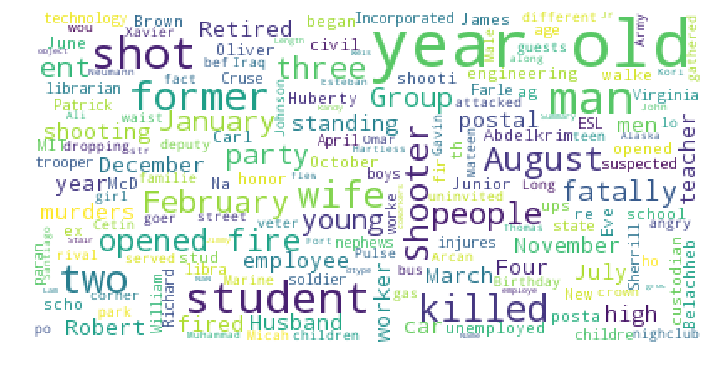

In [34]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(ms['Summary']))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Previously, we observed that most destruction occured when man was joined by a women. Let filter the data to see the buzz words of those incidents.

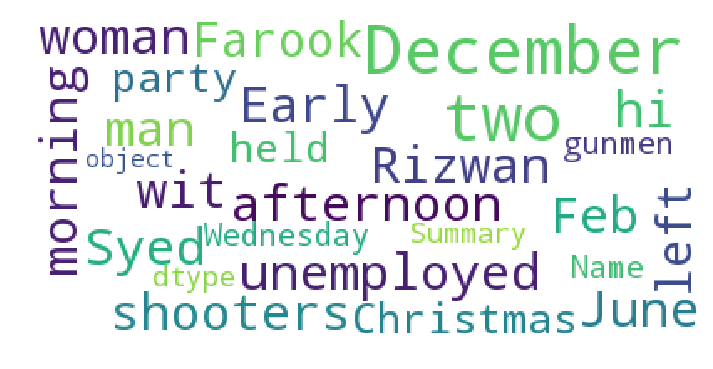

In [35]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(ms[ms['Gender'] == "Male/Female"]['Summary']))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Now, we are looking into the Race of White American or European American which is high.

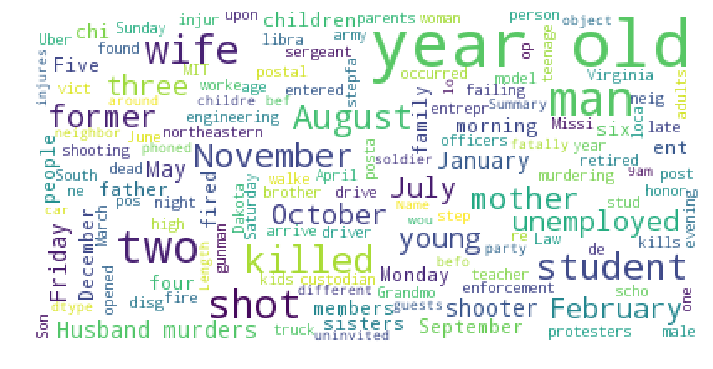

In [36]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(ms[ms['Race'] == "White American or European American"]['Summary']))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Now, Lets look into Mental Health Issues cases...

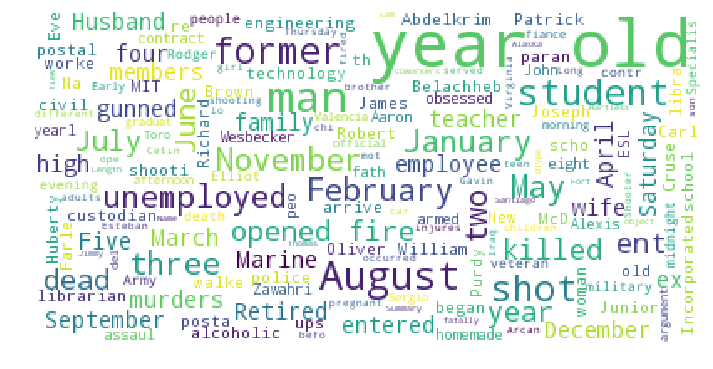

In [37]:
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(ms[ms['Mental Health Issues'] == 'Yes']['Summary']))

plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In mental cases, we can observe that these are the cases of Unemployed+Man+ Old+ Opened fired. So, we can say that when people are unemployed for a long time, it caused them frustrated. And so it leads to extreme action.  

I have covered analysis of Summary field by generating word clouds to see the buzz words. This data is required little more cleaning and transformation.
That's all for now, but stay tuned. In next version I will enhance Location based analysis and I will also try to cover City and States from Lat Lon variables to stream the data. generate more insights.  

> Thanking you in antipication and looking forward for comments.